# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


Effect of Learning Rate on SGD Convergence

The learning rate ($\eta$) is a tuning parameter that determines the step size at each iteration while moving toward a minimum of a loss function. In Stochastic Gradient Descent (SGD), where updates happen after every single training example, the learning rate is crucial for stability.

Low Learning Rate: Convergence is reliable but extremely slow. The model takes tiny steps, requiring more computational time and risking getting stuck in local minima.

High Learning Rate: The model may converge quickly initially but will likely "overshoot" the global minimum. This causes the loss to oscillate or even diverge (increase) indefinitely.

Optimal Learning Rate: The model follows a steady path to the minimum and settles there efficiently.

Strategies for Choosing/Adapting Learning Rates

1. Learning Rate Schedules (Decay)Instead of a fixed rate, you reduce the learning rate as training progresses. This allows for large steps at the beginning (speed) and small steps at the end (precision).Step Decay: Drop the rate by a factor every $X$ epochs.Exponential Decay: Gradually reduce the rate following an exponential curve.

2. Adaptive Learning Rates (Modern Optimizers)These algorithms adjust the learning rate automatically for each individual parameter based on the history of gradients.

AdaGrad: Scales the learning rate based on how frequently a feature appears.

RMSProp: An improvement over AdaGrad that prevents the learning rate from becoming too small too quickly.

Adam (Adaptive Moment Estimation): The most popular optimizer; it combines the benefits of "Momentum" (accelerating in the right direction) and "RMSProp" (scaling individual features).[Image comparing convergence of different optimizers like SGD, Adagrad, RMSprop, and Adam]

3. Learning Rate Finder

A common strategy in modern libraries (like Fast.ai) where you train the model for one epoch, starting with a very low learning rate and increasing it exponentially. You then pick the rate associated with the steepest drop in loss.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Preparation
data = fetch_california_housing()
X, y = data.data, data.target.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# 2. Hyperparameters
# Using a much smaller learning rate to prevent the explosion you saw
initial_lr = 0.0001
epochs = 50

# 3. Batch Gradient Descent
def batch_gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for _ in range(epochs):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients
    return theta

# 4. Stochastic Gradient Descent with Learning Schedule
def stochastic_gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n, 1))

    # Simple learning schedule to reduce LR over time
    def learning_schedule(t):
        return lr / (1 + 0.01 * t)

    for epoch in range(epochs):
        for i in range(m):
            # Update learning rate based on progress
            current_lr = learning_schedule(epoch * m + i)

            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= current_lr * gradients

            if np.isinf(theta).any() or np.isnan(theta).any():
                return theta
    return theta

# 5. Execution
theta_gd = batch_gradient_descent(X_train, y_train, 0.01, epochs) # Batch can handle 0.01
theta_sgd = stochastic_gradient_descent(X_train, y_train, 0.0001, epochs) # SGD needs it smaller

y_pred_gd = X_test.dot(theta_gd)
y_pred_sgd = X_test.dot(theta_sgd)

# 6. Results
print(f"{'Metric':<12} | {'Batch GD':<15} | {'Stochastic GD':<15}")
print("-" * 45)
print(f"{'MSE':<12} | {mean_squared_error(y_test, y_pred_gd):<15.4f} | {mean_squared_error(y_test, y_pred_sgd):<15.4f}")
print(f"{'R2 Score':<12} | {r2_score(y_test, y_pred_gd):<15.4f} | {r2_score(y_test, y_pred_sgd):<15.4f}")

Metric       | Batch GD        | Stochastic GD  
---------------------------------------------
MSE          | 1.2858          | 4.0596         
R2 Score     | 0.0188          | -2.0980        


# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **bas e 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



3.1 Theoretical and Numerical Questions

a) Learning Algorithm TypeA Decision Tree is a supervised learning algorithm. It requires a labeled dataset to learn a mapping from input features to a target value. During training, it uses provided class labels to determine optimal split points that best separate the data into its respective categories.

b) Entropy in Decision TreesIn decision trees, entropy measures the impurity or randomness within a node:Pure Node: If all points belong to one class, entropy is 0.Max Impurity: If classes are split 50/50, entropy is 1.0 (for binary classification).

c) Reduction in EntropyReduction in entropy (Information Gain) signifies that a split has made the resulting child nodes "purer" than the parent node. It represents the information gained by partitioning data based on a specific feature.

d) Numerical Problem Solutions

1. Entropy of the Root NodeWith 10 points (5 positive, 5 negative), the root is perfectly balanced:$$E_{root} = -\left(\frac{5}{10}\log_2\frac{5}{10} + \frac{5}{10}\log_2\frac{5}{10}\right) = \mathbf{1.00}$$2. & 3. Split AnalysisSplit A: ($x \le -2$?)Left Node: {1 point, 100% Negative} $\rightarrow E_L = 0$Right Node: {9 points, 5+, 4-} $\rightarrow E_R = 0.99$Weighted Avg Entropy: $(1/10 \times 0) + (9/10 \times 0.99) = 0.89$Information Gain: $1.00 - 0.89 = \mathbf{0.11}$Split B: ($x \le 2$?)Left Node: {9 points, 4+, 5-} $\rightarrow E_L = 0.99$Right Node: {1 point, 100% Positive} $\rightarrow E_R = 0$Weighted Avg Entropy: $(9/10 \times 0.99) + (1/10 \times 0) = 0.89$Information Gain: $1.00 - 0.89 = \mathbf{0.11}$Split C: ($y \le 2$?)Left Node: {5 points, 4+, 1-} $\rightarrow E_L = 0.72$Right Node: {5 points, 1+, 4-} $\rightarrow E_R = 0.72$Weighted Avg Entropy: $(5/10 \times 0.72) + (5/10 \times 0.72) = 0.72$Information Gain: $1.00 - 0.72 = \mathbf{0.28}$4. Optimal Split ChoiceThe split ($y \le 2$?) should be chosen because it results in the highest Information Gain (0.28).

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


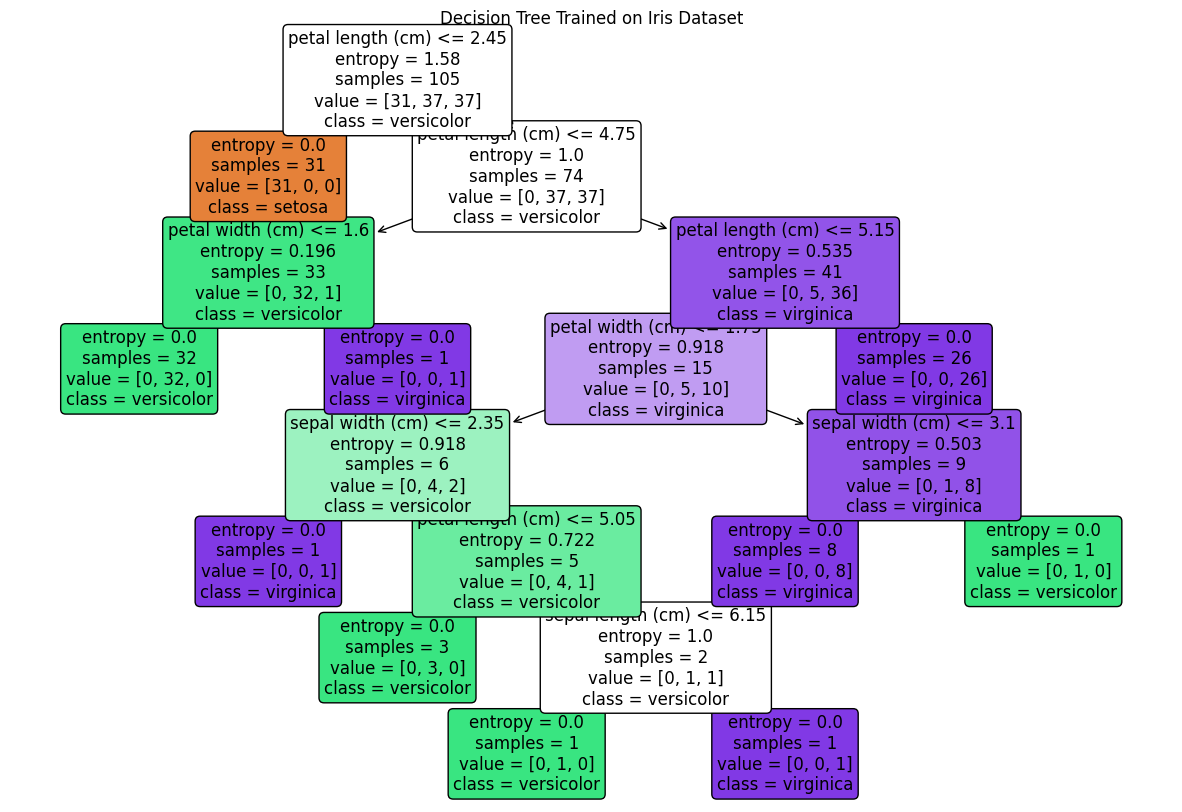

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# 3. Train the Decision Tree classifier
# We use 'entropy' or 'gini' as the criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# 4. Plot the learned decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



4.1 Theoretical Questions: Support Vector Machines (SVM)
a) Learning Algorithm Type
A Support Vector Machine (SVM) is a supervised learning algorithm. It is primarily used for classification and regression tasks. It requires a labeled dataset to learn the optimal hyperplane that separates different classes by maximizing the distance between them.

b) The Margin in SVM
The margin is the distance between the decision boundary (hyperplane) and the closest data points from either class.

Why maximize it? SVM aims to find the "Maximum Margin Hyperplane." A larger margin provides better generalization; it acts as a safety buffer, reducing the likelihood of misclassifying new, unseen data points that may lie near the boundary.

c) Support Vectors
Support vectors are the data points that lie closest to the decision boundary. They are the "critical" points that actually touch the edges of the margin.

Importance: The position of the decision boundary depends only on these support vectors. If you move or remove any other data points (that are not support vectors), the boundary remains unchanged. They define the orientation and location of the hyperplane.

d) Kernel Functions
The purpose of a kernel function is to transform data that is not linearly separable in its original lower-dimensional space into a higher-dimensional space where a linear separation becomes possible. This is known as the "Kernel Trick."

Two commonly used kernel functions:

Polynomial Kernel: Maps data into a polynomial feature space.

RBF (Radial Basis Function) / Gaussian Kernel: Maps data into an infinite-dimensional space; it is the most popular choice for non-linear data.

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

Conceptual Questions: Support Vector Machines (SVM)

a) Choosing the Optimal Separating Hyperplane
In a linearly separable dataset, there are infinitely many hyperplanes that can divide two classes. SVM chooses the optimal one by identifying the hyperplane that creates the maximum margin.

The algorithm specifically looks for the boundary where the distance to the nearest data points (the Support Vectors) on both sides is as large as possible. This "Maximum Margin Hyperplane" is chosen because it offers the highest degree of confidence for classifying future data.

b) Handling Non-Linearly Separable Data
When data points are overlapping or distributed in a way that a straight line cannot separate them, SVM handles the situation in two primary ways:

Soft Margin (Slack Variables): The algorithm allows for some misclassifications or points to fall within the margin. It tries to find a balance between finding a large margin and minimizing the number of points that cross it.

The Kernel Trick: SVM maps the input features into a higher-dimensional space where a linear boundary can separate the data. For example, a 2D circular distribution can be mapped into 3D where a flat plane can slice between the classes.

c) The Role of the Regularization Parameter C
The parameter C controls the trade-off between achieving a low training error and a large margin. It essentially tells the SVM how much you want to avoid misclassifying each training example.

When C is Very Large:

The optimizer chooses a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.

Effect: This leads to a "Hard Margin" approach. It is more accurate on training data but risks overfitting.

When C is Very Small:

The optimizer looks for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Effect: This leads to a "Soft Margin" approach. It is more robust and generalizes better, but if it's too small, the model may underfit.